IMPORT LIBRARIES

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight

In [2]:
# Ignore Furure Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

LOAD DATA

In [3]:
# Load the dataset from csv file
df = pd.read_csv("../data/raw/house_data.csv")

EXPLORATORY DATA ANALYSIS

In [4]:
# Display the first few rows of the dataset
print(df.head(5))

   Id  LotFrontage  LotArea Street Alley Utilities LotConfig Neighborhood  \
0   1         65.0     8450   Pave   NaN    AllPub    Inside      CollgCr   
1   2         80.0     9600   Pave   NaN    AllPub       FR2      Veenker   
2   3         68.0    11250   Pave   NaN    AllPub    Inside      CollgCr   
3   4         60.0     9550   Pave   NaN    AllPub    Corner      Crawfor   
4   5         84.0    14260   Pave   NaN    AllPub       FR2      NoRidge   

  Condition1 Condition2  ... PoolArea PoolQC  Fence  MiscFeature  MiscVal  \
0       Norm       Norm  ...        0    NaN    NaN          NaN        0   
1      Feedr       Norm  ...        0    NaN    NaN          NaN        0   
2       Norm       Norm  ...        0    NaN    NaN          NaN        0   
3       Norm       Norm  ...        0    NaN    NaN          NaN        0   
4       Norm       Norm  ...        0    NaN    NaN          NaN        0   

  MoSold YrSold SaleType  SaleCondition SalePrice  
0      2   2008       

In [5]:
#Shape
print(df.shape)

(1460, 51)


In [6]:
#Names of Variabels
print(df.columns.tolist())

['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'Heating', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageArea', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


Check Missing Data

In [7]:
# Check for missing values
df.isnull().sum()

Id                  0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
Utilities           0
LotConfig           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
TotalBsmtSF         0
Heating             0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
FullBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
GarageType         81
GarageArea          0
GarageCond         81
PavedDrive          0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal   

In [8]:
# List varaibels with missing data
col_misingData = df.columns[df.isnull().any()].tolist()
print(col_misingData)

['LotFrontage', 'Alley', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'GarageType', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [9]:
# Summary statistics of numerical features
df.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,103.685262,1057.429452,1162.626712,346.992466,...,2.866438,1.046575,6.517808,0.613014,472.980137,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,181.066207,438.705324,386.587738,436.528436,...,0.815778,0.220338,1.625393,0.644666,213.804841,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,795.750000,882.000000,0.000000,...,2.000000,1.000000,5.000000,0.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,991.500000,1087.000000,0.000000,...,3.000000,1.000000,6.000000,1.000000,480.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,166.000000,1298.250000,1391.250000,728.000000,...,3.000000,1.000000,7.000000,1.000000,576.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,...,8.000000,3.000000,14.000000,3.000000,1418.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Check Data Distribution

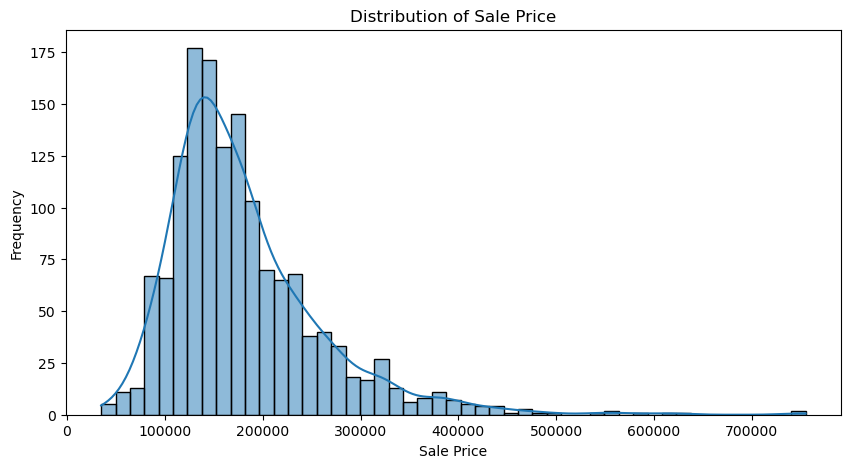

In [10]:
# Visualize the distribution of the target variable (house prices)
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

Check Duplicates

In [11]:
# Check duplicates in rows
duplicate_rows = df[df.duplicated()]
# Print duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [Id, LotFrontage, LotArea, Street, Alley, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, RoofStyle, RoofMatl, Exterior1st, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, TotalBsmtSF, Heating, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, FullBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageArea, GarageCond, PavedDrive, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 51 columns]


Check Outliers

In [12]:
# Separate features and target variable
df_features = df.drop(['Id', 'SalePrice'], axis=1)
target = df['SalePrice']

# Define the columns after removing 'Id' and target variable
num_features = df_features.select_dtypes(include=['number']).columns
cat_features = df_features.select_dtypes(include=['object']).columns

# Print shape of numerical and categorical features
print(df_features[cat_features].shape)
print(df_features[num_features].shape)

(1460, 28)
(1460, 21)


In [13]:
# Calcualte Z-score for numerical featuers )ignoring NANs)
z_score = df_features[num_features].apply(zscore, nan_policy='omit')
# Set a threshold for outliers detection
threshold = 3
# Identify outliers (replace with NaN)
outleir_mask = np.abs(z_score) > threshold
df_features[num_features][outleir_mask] = np.nan

# Now df_feature contains Nan values for outliers
print(df_features[num_features])

      LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
0            65.0     8450            7            5       2003       196.0   
1            80.0     9600            6            8       1976         0.0   
2            68.0    11250            7            5       2001       162.0   
3            60.0     9550            7            5       1915         0.0   
4            84.0    14260            8            5       2000       350.0   
...           ...      ...          ...          ...        ...         ...   
1455         62.0     7917            6            5       1999         0.0   
1456         85.0    13175            6            6       1978       119.0   
1457         66.0     9042            7            9       1941         0.0   
1458         68.0     9717            5            6       1950         0.0   
1459         75.0     9937            5            6       1965         0.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF

/tmp/ipykernel_148328/3671014121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[num_features][outleir_mask] = np.nan
/tmp/ipykernel_148328/3671014121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[num_features][outleir_mask] = np.nan


1. Outlier: Boxplot Method

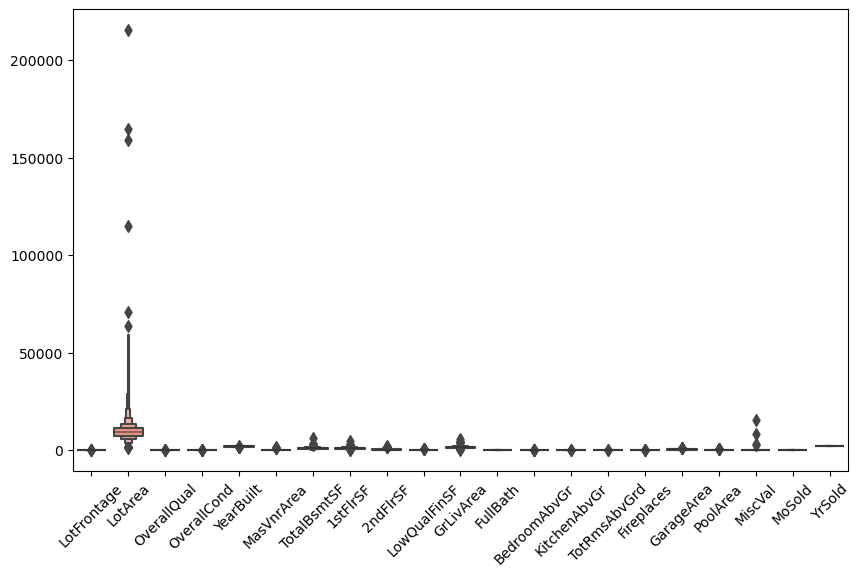

In [14]:
# Visualize numerical variables using box plots to check for outliers
plt.figure(figsize=(10,6))
sns.boxenplot(data=df_features[num_features])
plt.xticks(rotation=45)
plt.show()

2. Outliers: Histplot Method

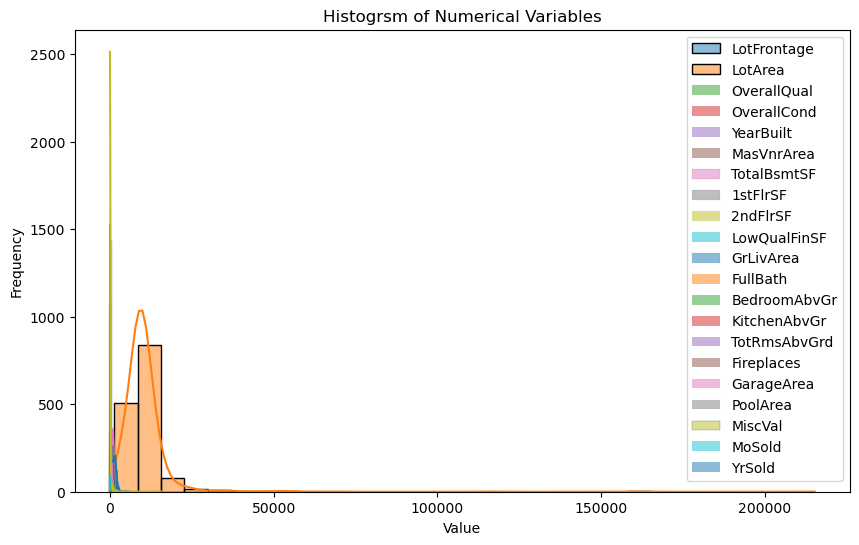

In [15]:
# Visualize numerical variabels using histograms to check for distribution and outliers
plt.figure(figsize=(10,6))
for col in num_features:
    sns.histplot(df_features[col], kde=True, bins=30, alpha=0.5, label=col)
plt.legend()
plt.title('Histogrsm of Numerical Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

3. Outliers: IQR Method

In [16]:
# Calculate statistis for numerical variavels to identify outliers
summary_stats = df_features.describe()
Q1 = summary_stats.loc['25%', :]
Q3 = summary_stats.loc['75%', :]
IRQ = Q3 -Q1
print(IRQ)

LotFrontage       21.00
LotArea         4048.00
OverallQual        2.00
OverallCond        1.00
YearBuilt         46.00
MasVnrArea       166.00
TotalBsmtSF      502.50
1stFlrSF         509.25
2ndFlrSF         728.00
LowQualFinSF       0.00
GrLivArea        647.25
FullBath           1.00
BedroomAbvGr       1.00
KitchenAbvGr       0.00
TotRmsAbvGrd       2.00
Fireplaces         1.00
GarageArea       241.50
PoolArea           0.00
MiscVal            0.00
MoSold             3.00
YrSold             2.00
dtype: float64


In [17]:
"""
# Calculate quartiles and IQR (assuming numeric columns only)
Q1 = df_trans.quantile(0.25)
Q3 = df_trans.quantile(0.75)
IQR = Q3 - Q1

# Display rows with outliers
outliers = ((df_trans < (Q1 - 1.5 * IQR)) | (df_trans > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_rows = df_features[outliers]
print("Rows with outliers:")
print(outlier_rows)
"""

'\n# Calculate quartiles and IQR (assuming numeric columns only)\nQ1 = df_trans.quantile(0.25)\nQ3 = df_trans.quantile(0.75)\nIQR = Q3 - Q1\n\n# Display rows with outliers\noutliers = ((df_trans < (Q1 - 1.5 * IQR)) | (df_trans > (Q3 + 1.5 * IQR))).any(axis=1)\noutlier_rows = df_features[outliers]\nprint("Rows with outliers:")\nprint(outlier_rows)\n'

# CORRELATION

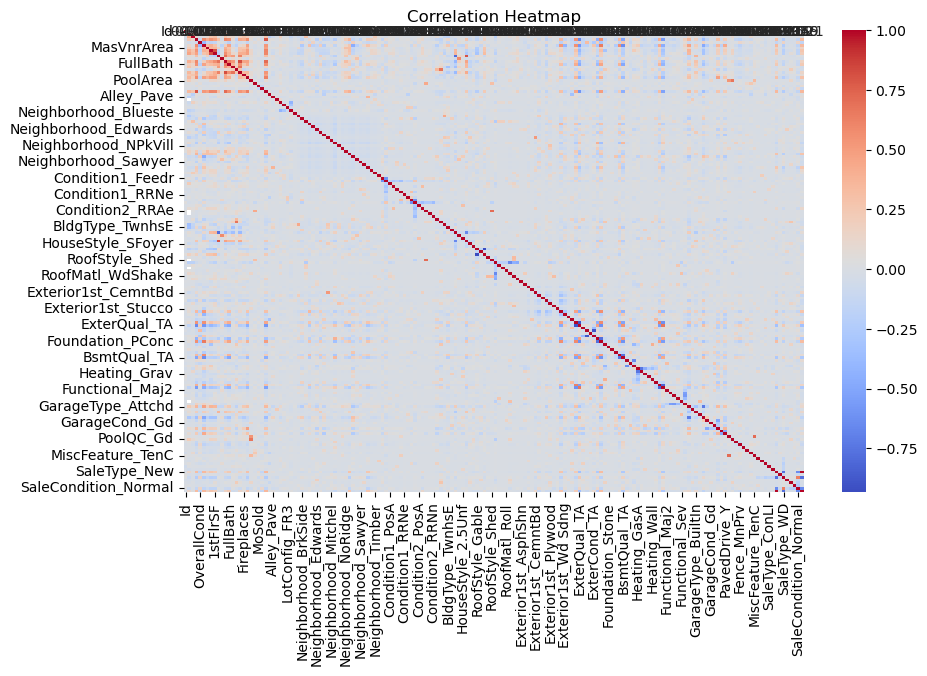

In [18]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Correlation heatmap to check the relationship between numerical features and target variable
cmax = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cmax,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

1. Numerical Varialbes Correlation

SalePrice            1.000000
OverallQual          0.790982
GrLivArea            0.708624
GarageArea           0.623431
TotalBsmtSF          0.613581
                       ...   
Foundation_CBlock   -0.343263
GarageType_Detchd   -0.354141
BsmtQual_TA         -0.452394
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Name: SalePrice, Length: 170, dtype: float64


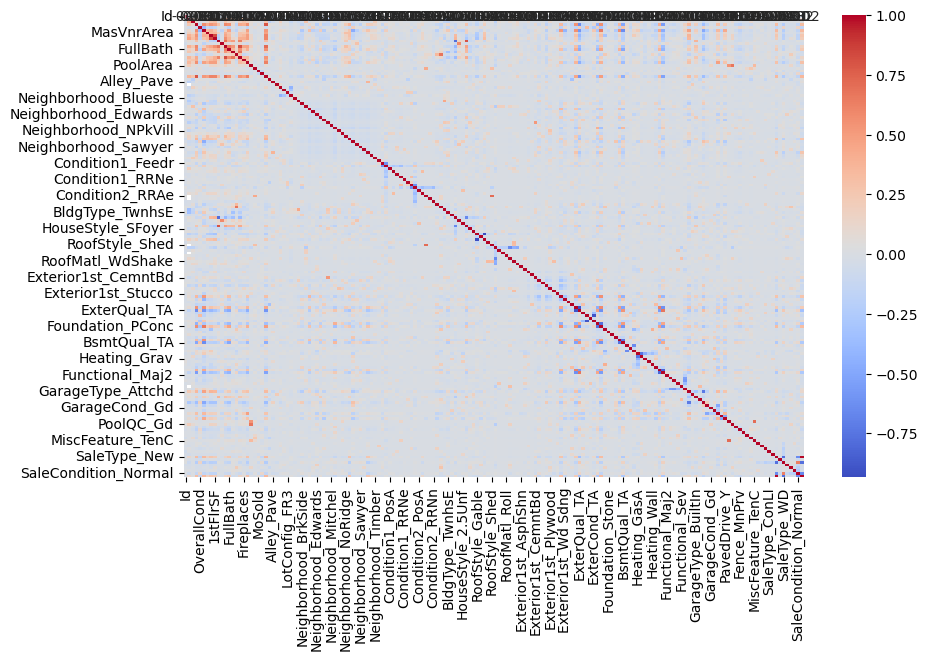

In [19]:
# Calculate the correlation matrix
corr_max = df.corr()

# Use the heatmap function from seaborn to plot the correlation matrix
plt.figure(figsize=(10,6))
# Plot the heatmap
sns.heatmap(corr_max, annot=True, fmt='.2f', cmap='coolwarm')
# Focus on the 'SalePrice' correlations
SalePrcie_corr = corr_max['SalePrice'].sort_values(ascending=False)
print(SalePrcie_corr)

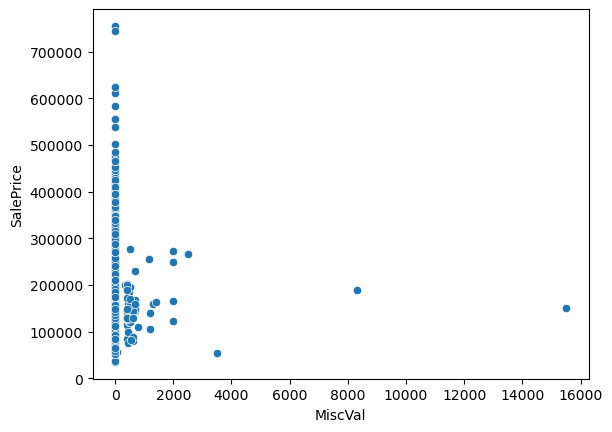

In [20]:
# Visualize correlation relationship using scatter plot
# Replace x values to compare each predictor variables
sns.scatterplot(data=df, x='MiscVal', y='SalePrice')
plt.show()

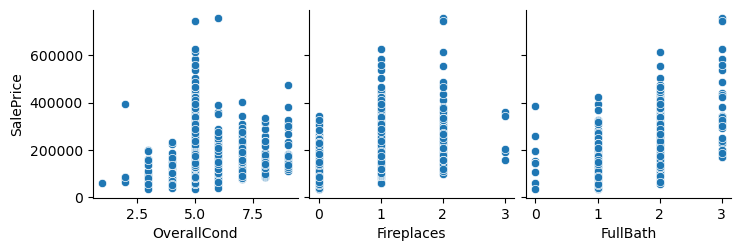

In [21]:
# Pairplot for scatter plots between numerical features and target variable
sns.pairplot(df,x_vars=['OverallCond','Fireplaces','FullBath'],y_vars=['SalePrice'])
plt.show()

# Preprocessing
##### 1. Handing Missing Data - MICE Method -> IterativeImputer/SimpleImputer
##### 2. Scaling data - StandardScaler
##### 3. Encoding Data - OneHotEncoder
##### 4. Handing Outliers -

In [29]:
###############
# Feature Engineering
#####################
# Create new features
df_features['TotalArea'] = df_features['TotalBsmtSF'] + df_features['1stFlrSF'] + df_features['2ndFlrSF']
df_features['PricePerSqft'] = df['SalePrice'] / df_features['TotalArea']
df_features['AgeOfProperty'] = 2024 - df_features['YearBuilt']

In [23]:
##############################
# Data Preprocessing Pipeline
##############################

# Create Pipleline for Numerical transformer
num_pipe = Pipeline([
    ('imputer', IterativeImputer(random_state=373)),
    ('scaler', RobustScaler()) # To handle outliers
    #('log_trans', FunctionTransformer(np.log1p))
])

# Create Pipleline for Categorical Transformer
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_features),
    ('cat', cat_pipe, cat_features)
])

##### Model Selection

In [24]:
#  Model Selection
models = {
    'Random Forest': RandomForestRegressor(random_state=373),
    'Gradient Boosting': GradientBoostingRegressor(random_state=373)
}

##### Hyperparameter Tuning

In [25]:
param_grid = {
    'Random Forest': {'model__n_estimators': [100, 200, 300]},  # Note the 'model__' prefix
    'Gradient Boosting': {'model__n_estimators': [100, 200, 300], 'model__learning_rate': [0.05, 0.1, 0.2]}
}

In [26]:
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)  # Ensure the model is correctly specified here
    ])
    
    grid_search = GridSearchCV(pipe, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(df_features, target)
    best_model = grid_search.best_estimator_
    
    # Splitting data for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.2, random_state=42)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'model': best_model, 'mse': mse, 'r2': r2}

# Display results
for name, result in results.items():
    print(f"{name} - Mean Squared Error: {result['mse']:.2f}, R-squared: {result['r2']:.2f}")

Random Forest - Mean Squared Error: 847163986.17, R-squared: 0.89
Gradient Boosting - Mean Squared Error: 697180423.61, R-squared: 0.91
